## Data Cleaning

In [1]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import re

N = 17255904 #Cavin's N number for random seed

In [2]:
from Data_cleaning import *

columns=['Name', 'Features', 'Location', 'Price', "Seller", "Auction_Type", "Date"] 
data_files = os.listdir("Data")
data_files.remove('.DS_Store')
data_path = "Data/"
print(data_files)

/content
Car_Predictor already Exists
/content/Car_Predictor
Already up to date.
['Porsche_911.csv', 'Volkswagen_Beetle.csv', 'bmw_3_Series.csv', 'Nissan_Z.csv', 'Mercedes_Benz_SL.csv', 'Toyota_Landrover.csv']


In [3]:
df_file = data_path + "Porsche_911.csv"
df = pd.read_csv(df_file, names=columns, header=None)

print("Raw Data")
print(df.shape)
data = clean_features(df)
data = clean_date(data)
data = clean_prices(data)
data = clean_name(data)
data = binarize_auctiontype(data)
data = binarize_transmission(data)
data = binarize_drive_side(data)
data.head(50)
print(data.isnull().sum())

data = data[data['Location'].notna()]
data = data[data['Price'].notna()]
data = data[data['Seller'].notna()]
data = data[data['Mileage'].notna()]
data = data[data['Condition'].notna()]
data = data[data['Date'].notna()]
data = data[data['DriveSide'].notna()]
data = data[data['Transmission_type'].notna()]
data = data.drop(columns=['NameOfModel'])
print("\nPost Cleaning")
print(data.shape)
print(data.isnull().sum())
data = clean_location(data)
data = data.drop(columns=['Date'])
data = data[data["Price"]<=200_000]

Raw Data
(12725, 7)
Location              220
Price                 658
Seller                  2
Date                    2
Mileage              2473
Condition            5758
NameOfModel             0
YearOfManufacture       0
Cabriolet               0
Coupe                   0
GT                      0
AuctionType             2
Transmission_type    1413
DriveSide            4071
dtype: int64

Post Cleaning
(5288, 13)
Location             0
Price                0
Seller               0
Date                 0
Mileage              0
Condition            0
YearOfManufacture    0
Cabriolet            0
Coupe                0
GT                   0
AuctionType          0
Transmission_type    0
DriveSide            0
dtype: int64


## Feature Engineering

In [4]:
target = "Price"
data.head()

,Price,Seller,Mileage,Condition,YearOfManufacture,Cabriolet,Coupe,GT,AuctionType,Transmission_type,DriveSide,Country
5,195000.000,Bring a Trailer,58926.0,Restored-Original,1974,0,1,0,1.0,1.0,1.0,USA
6,70574.400,Collecting Cars,60063.0,Original & Highly Original,2005,0,0,0,1.0,1.0,0.0,GBR
7,32639.152,Collecting Cars,53932.0,Original & Highly Original,2002,0,0,0,1.0,1.0,0.0,GBR
9,62000.000,Bring a Trailer,92140.0,Original & Highly Original,1985,0,0,0,1.0,1.0,1.0,USA
10,29500.000,Cars & Bids,55191.0,Modified,2002,0,1,0,1.0,1.0,1.0,USA


In [5]:
categorical_columns = ["Country", "Condition", "Seller"]
data_copy = data.copy()
for column in categorical_columns:
    if column not in data_copy.columns:
      continue
    le = LabelEncoder()
    data_copy[column] = le.fit_transform(data_copy[column].astype(str))
data_copy.head(5)

,Price,Seller,Mileage,Condition,YearOfManufacture,Cabriolet,Coupe,GT,AuctionType,Transmission_type,DriveSide,Country
5,195000.000,7,58926.0,6,1974,0,1,0,1.0,1.0,1.0,27
6,70574.400,12,60063.0,1,2005,0,0,0,1.0,1.0,0.0,12
7,32639.152,12,53932.0,1,2002,0,0,0,1.0,1.0,0.0,12
9,62000.000,7,92140.0,1,1985,0,0,0,1.0,1.0,1.0,27
10,29500.000,10,55191.0,0,2002,0,1,0,1.0,1.0,1.0,27


In [6]:
scaler = StandardScaler()
scaler = MinMaxScaler()
columns = list(data_copy.columns)
columns.remove(target)
scaler.fit(data_copy[columns])
data_copy[columns] = scaler.transform(data_copy[columns])
data_copy.head(5)

,Price,Seller,Mileage,Condition,YearOfManufacture,Cabriolet,Coupe,GT,AuctionType,Transmission_type,DriveSide,Country
5,195000.000,0.233333,0.158054,0.857143,0.157895,0.0,1.0,0.0,1.0,1.0,1.0,0.931034
6,70574.400,0.400000,0.161104,0.142857,0.701754,0.0,0.0,0.0,1.0,1.0,0.0,0.413793
7,32639.152,0.400000,0.144657,0.142857,0.649123,0.0,0.0,0.0,1.0,1.0,0.0,0.413793
9,62000.000,0.233333,0.247159,0.142857,0.350877,0.0,0.0,0.0,1.0,1.0,1.0,0.931034
10,29500.000,0.333333,0.148034,0.000000,0.649123,0.0,1.0,0.0,1.0,1.0,1.0,0.931034


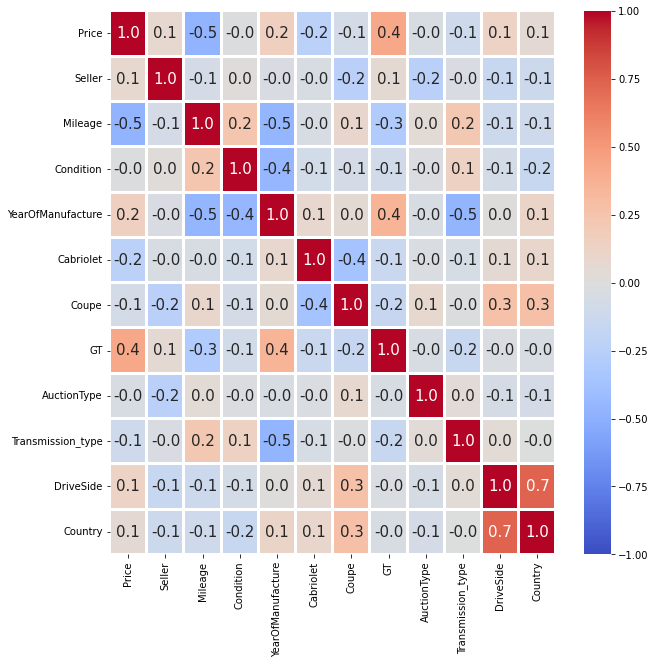

In [7]:
plt.figure(figsize=(10,10))  
sns.heatmap(data_copy.corr(), annot=True, fmt='.1f', linewidths=2, annot_kws={"fontsize":15}, vmin=-1, vmax=1, center= 0, cmap='coolwarm')

In [8]:
data_copy = data_copy.drop(["Country", "AuctionType", "Seller", "Transmission_type"], axis=1) #  ,"Cabriolet", "Coupe"

In [9]:
features = data_copy.drop(target, axis=1)
labels = data_copy[target]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=N)
y_test = np.around(y_test, -3)
y_train = np.around(y_train, -3)

print("Total :", len(labels))
print("Train :", len(y_train))
print("Test  :", len(y_test))

Total : 4540
Train : 3632
Test  : 908


In [10]:
for dataset in [y_train, y_test]:
    print(round(len(dataset) / len(labels), 2))
data_copy.isnull().sum()

0.8
0.2


Price                0
Mileage              0
Condition            0
YearOfManufacture    0
Cabriolet            0
Coupe                0
GT                   0
DriveSide            0
dtype: int64

## Regression

In [11]:
columns = list(data_copy.columns)
columns.remove(target)
def check_performance(regressor, X_train, y_train, X_test, y_test):
    print("Train:")
    y_pred = regressor.predict(X_train)
    y_pred = np.around(y_pred, -3)
    # print("R2 Score :", r2_score(y_true = y_train, y_pred = y_pred))
    print("RMSE :", mean_squared_error(y_train, y_pred, squared=False))

    print("\nTest:")
    y_pred = regressor.predict(X_test)
    y_pred = np.around(y_pred, -3)
    print("R2 Score :", r2_score(y_true = y_test, y_pred = y_pred))
    print("RMSE :", mean_squared_error(y_test, y_pred, squared=False))

In [12]:
# from sklearn.linear_model import LinearRegression as base_model_type
from sklearn.linear_model import Lasso as base_model_type

regressor = base_model_type()
regressor.fit(X_train, y_train)  

check_performance(regressor, X_train, y_train, X_test, y_test)

Train:
RMSE : 34684.139566160986

Test:
R2 Score : 0.3885999146663901
RMSE : 33211.543293402


<BarContainer object of 7 artists>

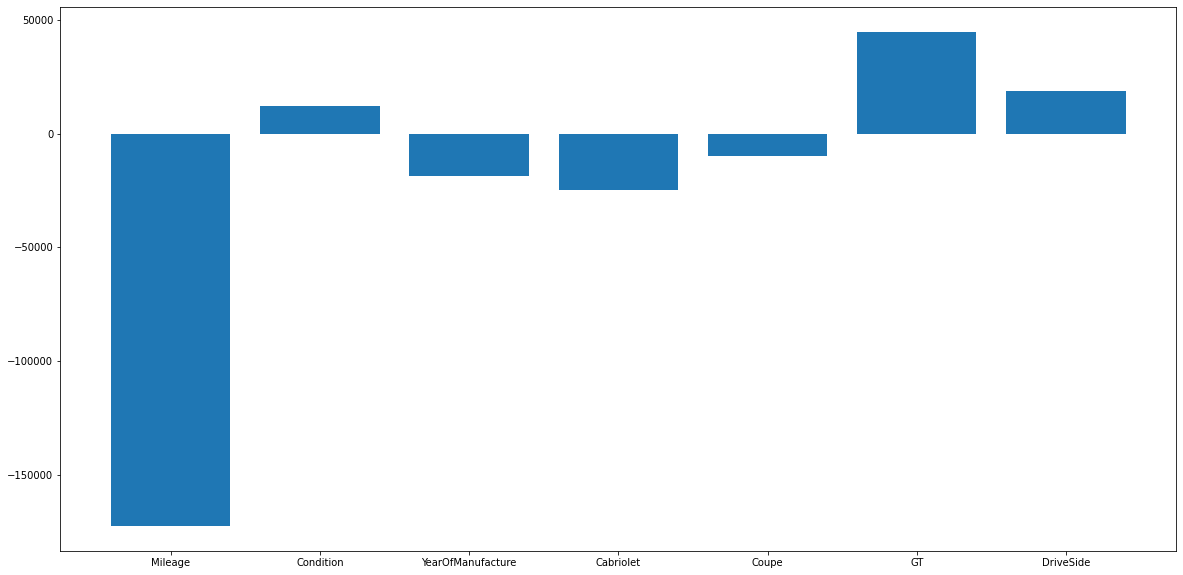

In [13]:
regressor.coef_
plt.figure(figsize=(20,10))
plt.bar(columns, list(regressor.coef_))

In [14]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

regressor = LGBMRegressor()
regressor.fit(X_train, y_train)

check_performance(regressor, X_train, y_train, X_test, y_test)
print("\nFeature Importances")
print(columns)
print(list(regressor.feature_importances_))

Train:
RMSE : 19857.726333953367

Test:
R2 Score : 0.700856973415158
RMSE : 23230.884804728656

Feature Importances
['Mileage', 'Condition', 'YearOfManufacture', 'Cabriolet', 'Coupe', 'GT', 'DriveSide']
[1303, 183, 1140, 83, 92, 95, 104]


<BarContainer object of 7 artists>

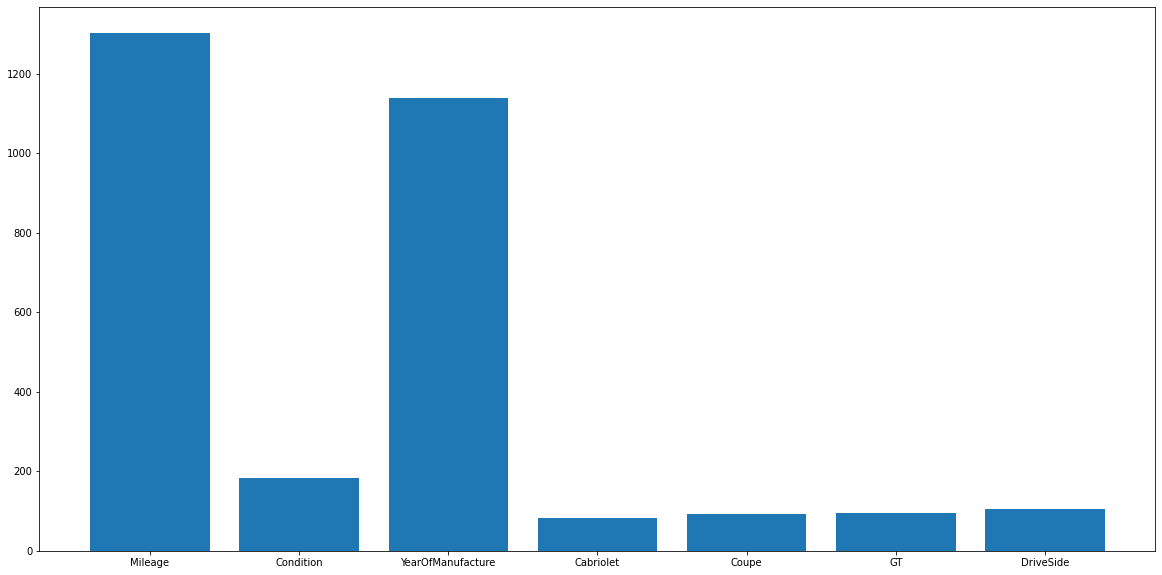

In [15]:
plt.figure(figsize=(20,10))
plt.bar(columns, list(regressor.feature_importances_))